# Project: Investigate European Soccer Database

Created by Yuhong on 7th-Jun-2019

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This datasource is from [Kaggle-European Soccer Database](https://www.kaggle.com/hugomathien/soccer). It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

>The data consists of following:
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The original data source is provided in sqlite. I have downloaded the data in csv files before analysis.

> The project aims to discover following questions:
- Which team has the biggest performance change over the time period? 
- Which players had the most penalties? 
- What player attributes lead to the hgiher overall rating ?


In [76]:
# import packages that will be used in this project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% matplotlib inline
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df_country=pd.read_csv('country.csv')
df_country.head(1)

,id,name
0,1,Belgium


In [3]:
df_league=pd.read_csv('league.csv')
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [4]:
df_match=pd.read_csv('match.csv')
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [5]:
df_player=pd.read_csv('player.csv')
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [6]:
df_player_att=pd.read_csv('player_attributes.csv')
df_player_att.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [7]:
df_sqlite_seq=pd.read_csv('sqlite_sequence.csv')
df_sqlite_seq.head(1)

,name,seq
0,Team,103916


In [8]:
df_team=pd.read_csv('team.csv')
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [9]:
df_team_att=pd.read_csv('team_attributes.csv')
df_team_att.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### Clean Column Labels

In [10]:
# rename df_team_att column headers
# Define function add_dash to format column string 
def add_dash(x):
    y='';
    for letter in x:
        if letter.isupper():
            letter= '_'+ letter.lower()
        y+=letter
    return y
df_team_att.rename(columns=lambda x:add_dash(x), inplace=True)
df_team_att.head(1)

,id,team_fifa_api_id,team_api_id,date,build_up_play_speed,build_up_play_speed_class,build_up_play_dribbling,build_up_play_dribbling_class,build_up_play_passing,build_up_play_passing_class,build_up_play_positioning_class,chance_creation_passing,chance_creation_passing_class,chance_creation_crossing,chance_creation_crossing_class,chance_creation_shooting,chance_creation_shooting_class,chance_creation_positioning_class,defence_pressure,defence_pressure_class,defence_aggression,defence_aggression_class,defence_team_width,defence_team_width_class,defence_defender_line_class
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [11]:
# Rename country labels
df_country.rename(columns=lambda x:"country_"+x, inplace=True)
df_country.head(1)

,country_id,country_name
0,1,Belgium


In [12]:
# Rename league labels
df_league.rename(index=str,columns={'id':'league_id','name':'league_name'},inplace=True)
df_league.head(1)

,league_id,country_id,league_name
0,1,1,Belgium Jupiler League


#### Handling missing data

In [13]:
# Checking missing data in team dataset
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [14]:
# checking missing data
# drop unwanted columns, then check missing data

#drop unwanted columns
df_match=df_match.loc[:,('id','country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id','home_team_goal','away_team_goal')]
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1


In [15]:
#Handling missing data
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


#### Transform data

In [16]:
# Explore match 
# check whether duplicate matches in dataset 
sum(df_match['match_api_id'].duplicated())

0

In [17]:
# create match outcome for home team
# home team goal > away team goal, then "W" -Win
# home team goal = away team goal, then "D" -Draw
# home team goal < away team goal, then "L" -Lose
df_match.loc[df_match['home_team_goal'] > df_match['away_team_goal'],'home_outcome']='w'
df_match.loc[df_match['home_team_goal'] == df_match['away_team_goal'],'home_outcome']='d'
df_match.loc[df_match['home_team_goal'] < df_match['away_team_goal'],'home_outcome']='l'

df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,d


In [18]:
# create match outcome for away team
# home team goal < away team goal, then "W" -Win
# home team goal == away team goal, then "D" -Draw
# home team goal > away team goal, then "L" -Lose
df_match.loc[df_match['home_team_goal'] < df_match['away_team_goal'],'away_outcome']='w'
df_match.loc[df_match['home_team_goal'] == df_match['away_team_goal'],'away_outcome']='d'
df_match.loc[df_match['home_team_goal'] > df_match['away_team_goal'],'away_outcome']='l'
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_outcome,away_outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,d,d


In [19]:
# concat two dataframes

df_match_home=df_match.loc[:,('id','country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'home_outcome')]
df_match_away=df_match.loc[:,('id','country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'away_team_api_id', 'away_outcome')]

df_match_home.rename(index=str,columns={'home_team_api_id':'team_api_id','home_outcome':'outcome'},inplace=True)
df_match_away.rename(index=str,columns={'away_team_api_id':'team_api_id','away_outcome':'outcome'},inplace=True)

df_match_outcome=pd.concat([df_match_home,df_match_away])
df_match_outcome.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,d


In [20]:
df_match_outcome.shape

(51958, 9)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1：Which team has the biggest performance change over the time period?

> By counting wins for each team in each season, we compare max wins and min wins and compute the difference, the one with biggest difference has the biggest performance change over years.

In [26]:
# Count wins for each team in each season
df_match_outcome.query('outcome=="w"',inplace=True)
df_match_outcome.loc[:,('season','date','match_api_id','team_api_id','outcome')]
df_match_cnt=df_match_outcome.groupby(['team_api_id','season'])['match_api_id'].agg({'count'}).reset_index()
df_match_cnt.head(1)

,team_api_id,season,count
0,1601,2008/2009,9


In [27]:
# Get max and min wins for each team
df_match_cnt2=df_match_cnt.groupby(['team_api_id'])['count'].agg({'max','min'}).reset_index().head(10)

In [29]:
# Derive difference between max and win
df_match_cnt2['diff']=df_match_cnt2['max']-df_match_cnt2['min']

In [30]:
df_match_cnt2.sort_values(by='diff', ascending=False).head(5)

,team_api_id,min,max,diff
0,1601,8,16,8
6,2186,4,12,8
2,1957,8,14,6
4,2182,13,19,6
5,2183,9,15,6


In [31]:
# merge with team dataset to get team name
df_match_merge_name=df_match_cnt2.merge(df_team, how='inner', on='team_api_id')
df_match_merge_name.loc[:,('team_long_name','diff')].sort_values(by='diff', ascending=False).head(5)

,team_long_name,diff
0,Ruch Chorzów,8
6,Cracovia,8
2,Jagiellonia Białystok,6
4,Lech Poznań,6
5,P. Warszawa,6


### Answer
> Team Paris Saint-Germain, Juventus,FC Zürich,Montpellier Hérault SC,and Sporting CP have the biggest performance change, the difference between max and min of number of wins in each season over past period is bigger than that of other teams.

### Research Question 2:  Which players had the most penalties?
> Sum penalties by groupping dataset by player ID

In [43]:
df_player_att.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [52]:
# sum penalties by groupping dataset by player ID
df_player_penalty=df_player_att.groupby(by=['player_api_id'])['penalties'].sum().reset_index()
df_player_penalty.sort_values('penalties',ascending=False).head(5)

,player_api_id,penalties
4087,41269,4314.0
5808,108808,4120.0
4247,41890,3984.0
1327,26472,3813.0
1029,25772,3799.0


In [58]:
# join df_player to get player name
df_player_penalty_name = df_player_penalty.merge(df_player, how='inner',on='player_api_id')
df_player_penalty_name.loc[:,('player_api_id','player_name','penalties')].sort_values('penalties',ascending=False).head(5)

,player_api_id,player_name,penalties
4087,41269,Alessio Cerci,4314.0
5808,108808,Mario Balotelli,4120.0
4247,41890,Claudio Marchisio,3984.0
1327,26472,Michael Bradley,3813.0
1029,25772,Zdravko Kuzmanovic,3799.0


### Answer
> Player Alessio Cerci has the most penalities over past several years.

### Research Question 3:  What player attributes lead to the hgiher overall rating ?
> Find correlation between overall rating and player attributes by plotting scater graphs

In [85]:
df_player_att.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [65]:
df_player_att_plot=df_player_att.loc[:,('overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes')]
df_player_att_plot.head(1)

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


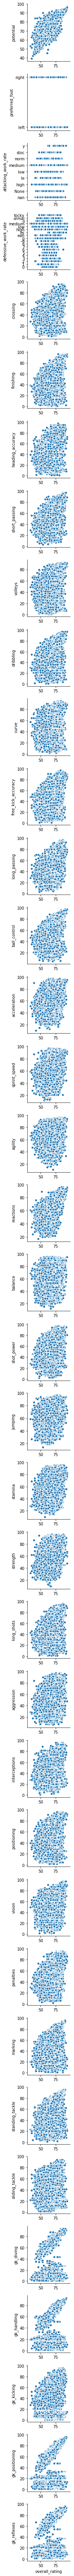

In [83]:
sns.pairplot(df_player_att_plot,  y_vars=['potential','preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],x_vars=["overall_rating"])

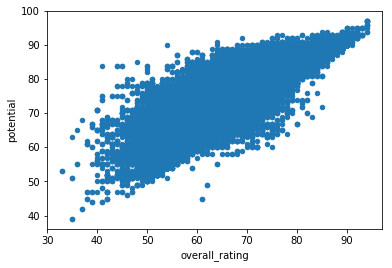

In [79]:
# plot overall_rating and potential
df_player_att_plot.plot.scatter(x='overall_rating',y='potential')

### Answer
> Potential has a postive correlation with overall rating

<a id='conclusions'></a>
## Conclusions

1. Team Paris Saint-Germain, Juventus,FC Zürich,Montpellier Hérault SC,and Sporting CP have the biggest performance change over past period. The difference between max and min of number of wins in each season is bigger than that of other teams.

2. Over the past several years, Player Alessio Cerci has the most penalities.

3. Among many attributes of players, Potential of player has a strong postive correlation with player's overall rating


In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0